In [5]:
from underthesea import sent_tokenize
import pandas as pd
from pyvi import ViTokenizer
import re
class Data_transformer:
    def __init__(self) -> None:
        self.__tokenizer = ViTokenizer
        pass
    def __removepunc(self, text):
        return re.sub(r'[^\w\s]','',text)
    def __tokenize(self, text):
        return self.__tokenizer.tokenize(text)
    def text_preprocessing(self, text):
        text_token = self.__tokenize(text)
        text_remove_punc = self.__removepunc(text_token)
        return text_remove_punc.lower()
    def read_text_only(self, filename):
        texts = []
        with open(filename, 'r', encoding='utf-8') as f:
            lines = filter(None, (line.rstrip() for line in f))
            for line in lines:
                line = line.strip()
                if line.startswith('#'):
                    pass
                elif line.startswith('{') and line.endswith('}'):
                    pass
                else:
                    texts.append(line)
        return texts
    def load_data(self, filename):
        data = []
        with open(filename, 'r', encoding='utf-8') as f:
            index = 0
            texts = []
            for line in f:
                line = line.strip()
                if line.startswith('#'):
                    #index = int(line[1:])
                    pass
                elif line.startswith('{') and line.endswith('}'):
                    aspects = re.findall(r'{(.+?),\s*(.+?)}', line)
                    min_len = len(aspects) if len(aspects)<len(texts) else len(texts) 
                    for i in range(min_len):
                        aspect, sentiment = aspects[i]
                        text = texts[i]
                        s_attribute = aspect.split('#')
                        data_line = [self.text_preprocessing(text), sentiment, s_attribute[0], s_attribute[1]]
                        data.append(data_line) 
                else:
                    texts = sent_tokenize(line)
        return data
    def load_to_df(self, filename, columns = ['text', 'label', 'entity', 'attribute']):
        data = self.load_data(filename)
        df = pd.DataFrame(data=data, columns=columns)
        return df
    def text2feature(self, text):
        list_f = []
        list_text = sent_tokenize(text)
        for text in list_text:
            list_f.append(self.text_preprocessing(text))
        return list_f

        

## Hotel

In [6]:
data_trans = Data_transformer()
df = data_trans.load_to_df('data_hotel_train.txt')
df.head(20)

,text,label,entity,attribute
0,rộng_rãi ks mới nhưng rất vắng,positive,HOTEL,DESIGN&FEATURES
1,các dịch_vụ chất_lượng chưa cao và thiếu,negative,HOTEL,GENERAL
2,địa_điểm thuận_tiện trong vòng bán_kính 15 km...,positive,LOCATION,GENERAL
3,phục_vụ view đẹp vị_trí,positive,SERVICE,GENERAL
4,thuận_tiện sạch_sẽ vui_vẻ hài_lòng,positive,HOTEL,COMFORT
5,vị_trí đẹp có quán bar view đẹp nhân_viên th...,positive,LOCATION,GENERAL
6,co view huong ho_tay sach se nhan vien tan ...,positive,HOTEL,GENERAL
7,phòng_ốc sạch giường thoải_mái nhân_viên thâ...,positive,ROOMS,CLEANLINESS
8,gần hồ_tây view nhìn ra hồ lãng_mạn đi bộ dọ...,positive,LOCATION,GENERAL
9,hình_thức không_thể quyết_định nội_dung h at...,positive,HOTEL,COMFORT


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

<AxesSubplot: xlabel='label', ylabel='count'>

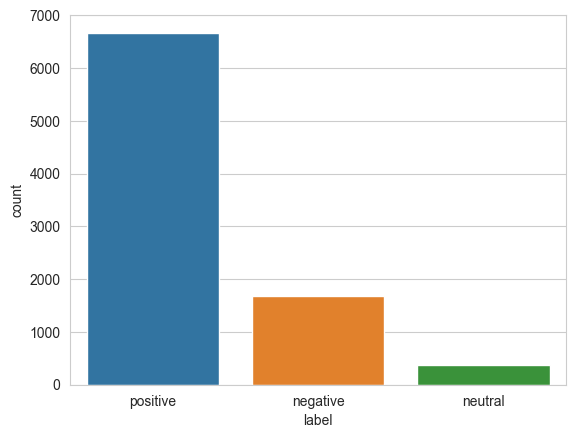

In [8]:
sns.countplot(df,x='label')

<AxesSubplot: xlabel='entity', ylabel='count'>

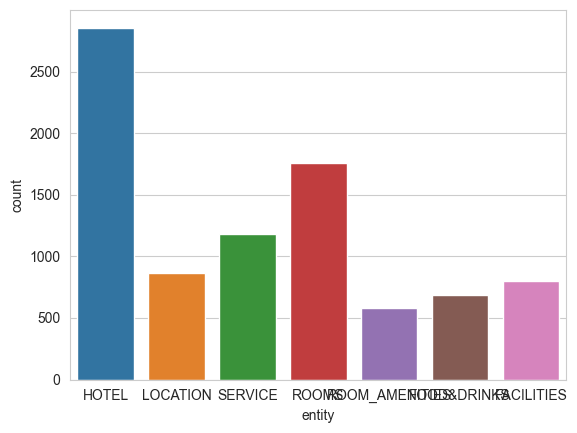

In [9]:
sns.countplot(df,x='entity')

<AxesSubplot: xlabel='attribute', ylabel='count'>

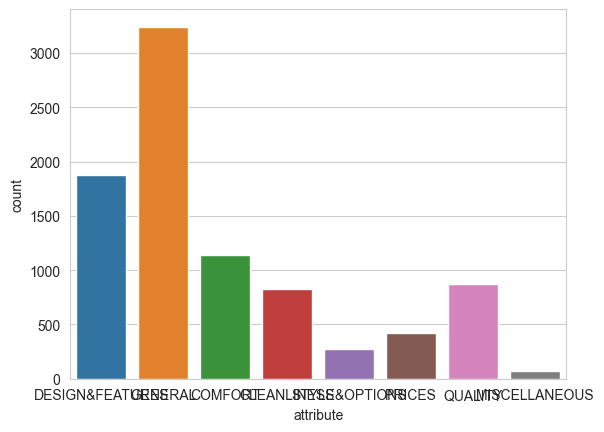

In [10]:
sns.countplot(df,x='attribute')

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
class Aspect_nb_model:
    def __init__(self) -> None:
        self.data_trans = Data_transformer()
        pass
    def fit3layer(self, df):
        X = df['text']
        y_sen = df['label']
        y_entity = df['entity']
        y_attr = df['attribute']
        self.pineline_sen = Pipeline([
            ('cv', CountVectorizer()),
            ('nb', MultinomialNB())
        ]) 
        self.pineline_sen.fit(X, y_sen)

        self.pineline_entity = Pipeline([
            ('cv', CountVectorizer()),
            ('nb', MultinomialNB())
        ]) 
        self.pineline_entity.fit(X, y_entity)

        self.pineline_attr = Pipeline([
            ('cv', CountVectorizer()),
            ('nb', MultinomialNB())
        ]) 
        self.pineline_attr.fit(X, y_attr)
        pass 
    def fit_label(self, df):
        X = df['text']
        y = df['label']
        self.pineline = Pipeline([
            ('cv', CountVectorizer()),
            ('nb', MultinomialNB())
        ]) 
        self.pineline.fit(X, y)
        pass
    def evaluate(self, df):
        X = df['text']
        y_sen_true = df['label']
        y_sen_pred = self.pineline_sen.predict(X)

        y_entity_true = df['entity']
        y_entity_pred = self.pineline_entity.predict(X)
        
        y_attr_true = df['attribute']
        y_attr_pred = self.pineline_attr.predict(X)
        print(classification_report(y_sen_true, y_sen_pred))
        print(classification_report(y_entity_true, y_entity_pred))
        print(classification_report(y_attr_true, y_attr_pred))
    
    def detail_predict(self, text):
        aspect_l = []
        texts = data_trans.text2feature(text)
        for text in texts:
            entity = self.pineline_entity.predict([text])
            attr = self.pineline_attr.predict([text])
            sen = self.pineline_sen.predict([text])
            aspect_l.append(f'({entity[0]}#{attr[0]}, {sen[0]})')
        return aspect_l


In [12]:
model = Aspect_nb_model()
model.fit3layer(df)

In [13]:
model.detail_predict("Ga giường không sạch, nhân viên quên dọn phòng một ngày.")

['(ROOMS#CLEANLINESS, negative)']

In [14]:
df_test = data_trans.load_to_df('data_hotel_test.txt')
df_test.head(5)

,text,label,entity,attribute
0,ga giường không sạch nhân_viên quên dọn phòng...,negative,ROOM_AMENITIES,CLEANLINESS
1,nv nhiệt_tình phòng ở sạch_sẽ tiện_nghi vị_...,positive,SERVICE,GENERAL
2,đi bộ ra biển gần tiện đi_lại phòng view biển...,positive,LOCATION,GENERAL
3,tất_cả mọi thứ đều sạch_sẽ giường ngủ rất tho...,positive,HOTEL,CLEANLINESS
4,không có quạt_điện mà chỉ có_điều hòa nên có c...,positive,ROOM_AMENITIES,COMFORT


In [18]:
model.evaluate(df)

              precision    recall  f1-score   support

    negative       0.63      0.60      0.61      1679
     neutral       0.73      0.10      0.18       373
    positive       0.87      0.93      0.90      6670

    accuracy                           0.83      8722
   macro avg       0.75      0.54      0.56      8722
weighted avg       0.82      0.83      0.81      8722

                precision    recall  f1-score   support

    FACILITIES       0.64      0.29      0.40       797
   FOOD&DRINKS       0.50      0.33      0.40       688
         HOTEL       0.53      0.77      0.62      2857
      LOCATION       0.47      0.52      0.50       865
         ROOMS       0.48      0.50      0.49      1757
ROOM_AMENITIES       0.74      0.19      0.30       580
       SERVICE       0.48      0.33      0.39      1178

      accuracy                           0.51      8722
     macro avg       0.55      0.42      0.44      8722
  weighted avg       0.53      0.51      0.49      8722



In [15]:
model.evaluate(df_test)

              precision    recall  f1-score   support

    negative       0.41      0.65      0.51       231
     neutral       0.00      0.00      0.00        84
    positive       0.88      0.85      0.86      1154

    accuracy                           0.77      1469
   macro avg       0.43      0.50      0.46      1469
weighted avg       0.76      0.77      0.76      1469

                precision    recall  f1-score   support

    FACILITIES       0.15      0.03      0.05        68
   FOOD&DRINKS       0.44      0.27      0.34       143
         HOTEL       0.34      0.52      0.41       290
      LOCATION       0.41      0.35      0.37       153
         ROOMS       0.35      0.56      0.43       356
ROOM_AMENITIES       0.43      0.09      0.15       183
       SERVICE       0.47      0.29      0.36       276

      accuracy                           0.37      1469
     macro avg       0.37      0.30      0.30      1469
  weighted avg       0.38      0.37      0.34      1469



C:\Users\drawt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\drawt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\drawt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

In [17]:
textlist = data_trans.read_text_only('data_hotel_test.txt')
for i in range(10):
    print(f'#{i+1}')
    text = textlist[i]
    print(text)
    print(str(model.detail_predict(text)))
    

#1
﻿#1
['(HOTEL#GENERAL, positive)']
#2
Ga giường không sạch, nhân viên quên dọn phòng một ngày.
['(ROOMS#CLEANLINESS, negative)']
#3
Nv nhiệt tình, phòng ở sạch sẽ, tiện nghi, vị trí khá thuận tiện cho việc di chuyển đến các địa điểm ăn + chơi Phòng có gián
['(LOCATION#GENERAL, positive)']
#4
Đi bộ ra biển gần, tiện đi lại Phòng view biển nhưng cửa sổ view biển khá bé
['(LOCATION#GENERAL, positive)']
#5
Tất cả mọi thứ đều sạch sẽ, giường ngủ rất thoải mái. Không có quạt điện mà chỉ có điều hòa nên có chút bất tiện.
['(HOTEL#COMFORT, positive)', '(ROOMS#GENERAL, negative)']
#6
Giường sạch sẽ, thoải mái, đầy đủ thiết bị cần thiết, ăn cũng trang bị sẵn nếu bạn lười Phòng tắm chưa chia được ko gian khô và ướt
['(ROOMS#DESIGN&FEATURES, negative)']
#7
phòng ốc mới, sang trọng, giường thoải mái, sạch sẽ Chỗ để xe hơi chật chọi
['(ROOMS#DESIGN&FEATURES, positive)']
#8
Khăn tắm cũ, dơ. Đồ dùng trong toilet là đồ sử dụng lại. Không phải đồ nguyên seal
['(ROOMS#GENERAL, negative)', '(ROOM_

## Restaurant

In [19]:
df_res = data_trans.load_to_df('data_Restaurant_train.txt')
df_res.head(5)

,text,label,entity,attribute
0,_ ảnh chụp từ hôm_qua đi chơi với gia_đình và...,neutral,FOOD,STYLE&OPTIONS
1,_ hôm_qua đi ăn trưa muộn ai cũng đói hết nên...,neutral,FOOD,QUALITY
2,_hương vị thơm ngon ăn cay cay rất thích nêm...,positive,FOOD,QUALITY
3,ngoài_ra menu quán cũng nhiều món khác nhau th...,positive,FOOD,STYLE&OPTIONS
4,khách của quán đông nên nhiều khi nhân_viên ph...,positive,AMBIENCE,GENERAL


In [20]:
model_res = Aspect_nb_model()
model_res.fit3layer(df_res)

In [22]:
model_res.evaluate(df_res)

              precision    recall  f1-score   support

    negative       0.65      0.17      0.27       456
     neutral       0.80      0.32      0.46      1169
    positive       0.82      0.98      0.90      5362

    accuracy                           0.82      6987
   macro avg       0.76      0.49      0.54      6987
weighted avg       0.81      0.82      0.78      6987

              precision    recall  f1-score   support

    AMBIENCE       0.59      0.36      0.44       535
      DRINKS       0.58      0.08      0.13       185
        FOOD       0.75      0.95      0.84      4676
    LOCATION       0.73      0.35      0.48       274
  RESTAURANT       0.65      0.33      0.44       840
     SERVICE       0.64      0.19      0.30       477

    accuracy                           0.73      6987
   macro avg       0.66      0.38      0.44      6987
weighted avg       0.71      0.73      0.69      6987

               precision    recall  f1-score   support

      GENERAL       

In [23]:
df_rest_test = data_trans.load_to_df('data_Restaurant_test.txt')

In [24]:
model_res.evaluate(df_rest_test)

              precision    recall  f1-score   support

    negative       0.20      0.02      0.03       125
     neutral       0.44      0.07      0.12       477
    positive       0.71      0.98      0.82      1386

    accuracy                           0.70      1988
   macro avg       0.45      0.35      0.32      1988
weighted avg       0.61      0.70      0.60      1988

              precision    recall  f1-score   support

    AMBIENCE       0.26      0.10      0.15       224
      DRINKS       0.00      0.00      0.00       144
        FOOD       0.53      0.88      0.66       981
    LOCATION       0.53      0.14      0.23       166
  RESTAURANT       0.25      0.15      0.18       340
     SERVICE       0.40      0.06      0.10       133

    accuracy                           0.49      1988
   macro avg       0.33      0.22      0.22      1988
weighted avg       0.40      0.49      0.40      1988

               precision    recall  f1-score   support

      GENERAL       

C:\Users\drawt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\drawt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\drawt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

In [25]:
textlist = data_trans.read_text_only('data_Restaurant_test.txt')
for i in range(10):
    print(f'#{i+1}')
    text = textlist[i]
    print(text)
    print(str(model_res.detail_predict(text)))

#1
﻿#1
['(FOOD#QUALITY, positive)']
#2
Đây là 1 trong những quán mà mình thích vì vị trà đậm và thơm cũng như mùi vị đặc trưng hơn hẳn những quán khác nè  Trà sữa trân châu sợi - 46k Trà sữa pha khá ngon, vị trà chát và mùi hương khá rõ, không quá ngọt, rất đúng với gu mình  Trà đào - 45k Vị trà đào ở đây cũng đặc biệt hơn hẳn những quán khác, không phải chua ngọt như thưởng thấy mà có mùi trà rất ngon  Cà phê đá xay - 65k Món đá xay ở đây uống cũng ngon không kém trà nè, mùi vị thơm hương cà phê, vị đắng kết hợp hoàn hảo với độ béo ngọt của whipping cream, không quá đắng, cũng không quá ngọt hay lạt lẽo mà dịu nhẹ, thơm và dễ uống lắm  Trà vải thiết quan âm - 45k Trà vải có mùi vị rất thơm ngon mùi vải mà vẫn nghe rõ vị trà, có chút vị chát nhẹ mùi trà thơm rất thích, không phải chỉ toàn vị syrup vải ngọt gắt như nhiều chỗ khác. Do trà ở đây pha khá đậm nên bạn nào uống mà đang đói sẽ dễ say nha, hoặc ban đêm có thể khó ngủ à, cảnh báo trước  Trà thiết quan âm latte - 47k Ly này thì v